In [11]:
# Download the dataset
!wget http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz

# Create a new directory for extraction
!mkdir speech_commands_dataset

# Extract the dataset into the new directory
!tar -xvzf speech_commands_v0.02.tar.gz -C speech_commands_dataset


Streaming output truncated to the last 5000 lines.
./on/fc3ba625_nohash_0.wav
./on/db9d52d2_nohash_0.wav
./on/72242187_nohash_4.wav
./on/b0f5b16d_nohash_0.wav
./on/d9aa8c90_nohash_1.wav
./on/525eaa62_nohash_0.wav
./on/42e3f068_nohash_0.wav
./on/94d370bf_nohash_4.wav
./on/bf8d5617_nohash_0.wav
./on/e2b7d6d6_nohash_2.wav
./on/89ed36ab_nohash_0.wav
./on/30276d03_nohash_1.wav
./on/364c0853_nohash_0.wav
./on/7cbf645a_nohash_0.wav
./on/c98bbbd3_nohash_2.wav
./on/9a7c1f83_nohash_5.wav
./on/3589bc72_nohash_0.wav
./on/3ae5c04f_nohash_0.wav
./on/adc216c5_nohash_2.wav
./on/c50f55b8_nohash_15.wav
./on/324210dd_nohash_2.wav
./on/c120e80e_nohash_2.wav
./on/69086eb0_nohash_0.wav
./on/dce05676_nohash_1.wav
./on/435695e3_nohash_1.wav
./on/179a61b7_nohash_1.wav
./on/f5341341_nohash_0.wav
./on/91b03183_nohash_0.wav
./on/96d8bb6f_nohash_2.wav
./on/6a1908f8_nohash_0.wav
./on/6ace4fe1_nohash_1.wav
./on/84d1e469_nohash_1.wav
./on/ba676390_nohash_0.wav
./on/1dc86f91_nohash_4.wav
./on/3a929277_nohash_2.wav
./o

In [13]:
import os

# Define the correct path to the extracted dataset
dataset_path = 'speech_commands_dataset'  # Adjusted for the new extraction directory

# List available commands (subdirectories within the dataset folder)
commands = os.listdir(dataset_path)
print(f"Available commands: {commands}")


Available commands: ['no', 'right', 'left', 'zero', 'seven', 'forward', 'six', '_background_noise_', 'two', 'wow', 'happy', 'four', 'one', 'down', 'sheila', 'learn', 'go', 'bed', 'validation_list.txt', 'yes', 'on', 'house', 'bird', '.DS_Store', 'nine', 'stop', 'three', 'up', 'dog', 'backward', 'testing_list.txt', 'tree', 'LICENSE', 'five', 'marvin', 'README.md', 'off', 'eight', 'cat', 'follow', 'visual']


In [16]:
commands = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

In [17]:
samples_per_command = {command: len(os.listdir(os.path.join(dataset_path, command))) for command in commands}


In [18]:
print(f"Available commands: {commands}")
print(f"Samples per command: {samples_per_command}")

Available commands: ['no', 'right', 'left', 'zero', 'seven', 'forward', 'six', '_background_noise_', 'two', 'wow', 'happy', 'four', 'one', 'down', 'sheila', 'learn', 'go', 'bed', 'yes', 'on', 'house', 'bird', 'nine', 'stop', 'three', 'up', 'dog', 'backward', 'tree', 'five', 'marvin', 'off', 'eight', 'cat', 'follow', 'visual']
Samples per command: {'no': 3941, 'right': 3778, 'left': 3801, 'zero': 4052, 'seven': 3998, 'forward': 1557, 'six': 3860, '_background_noise_': 7, 'two': 3880, 'wow': 2123, 'happy': 2054, 'four': 3728, 'one': 3890, 'down': 3917, 'sheila': 2022, 'learn': 1575, 'go': 3880, 'bed': 2014, 'yes': 4044, 'on': 3845, 'house': 2113, 'bird': 2064, 'nine': 3934, 'stop': 3872, 'three': 3727, 'up': 3723, 'dog': 2128, 'backward': 1664, 'tree': 1759, 'five': 4052, 'marvin': 2100, 'off': 3745, 'eight': 3787, 'cat': 2031, 'follow': 1579, 'visual': 1592}


In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(list(samples_per_command.items()), columns=['Command', 'Samples'])

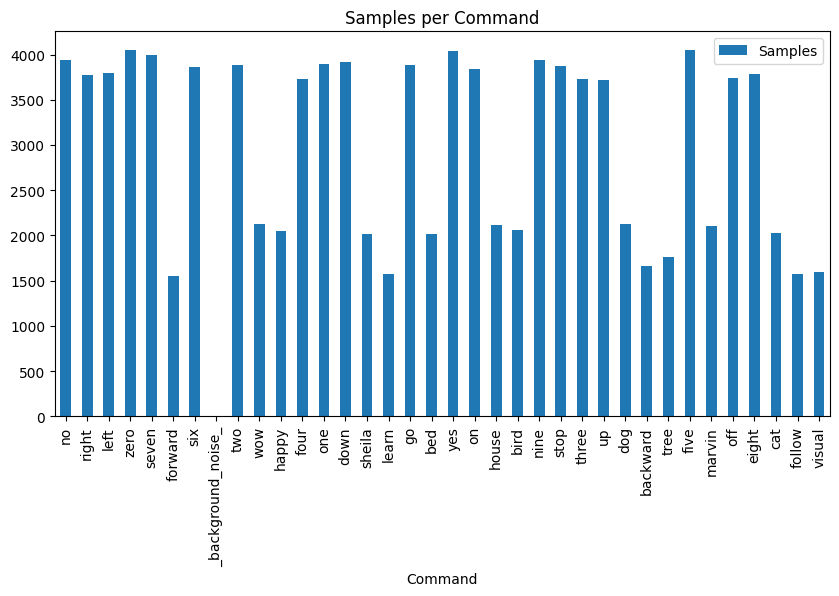

In [22]:
df.set_index('Command').plot(kind='bar', figsize=(10, 5), title='Samples per Command')
plt.show()

In [97]:
import os
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define constants
DATA_DIR = './speech_commands_dataset'
SAMPLE_RATE = 16000
DURATION = 1.0
N_MFCC = 13
N_FFT = 2048
HOP_LENGTH = 512

def load_data(data_dir):
    data = []
    labels = []
    categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    for category in categories:
        path = os.path.join(data_dir, category)
        for file in os.listdir(path):
            if file.endswith('.wav'):
                file_path = os.path.join(path, file)
                audio, _ = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
                if len(audio) == SAMPLE_RATE:
                    mfccs = librosa.feature.mfcc(y=audio, sr=SAMPLE_RATE, n_mfcc=N_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH)
                    data.append(mfccs)
                    labels.append(category)
    return np.array(data), np.array(labels)

# Load and preprocess data
X, y = load_data(DATA_DIR)
X = np.expand_dims(X, axis=-1)  # Add channel dimension for CNN

In [98]:
# Adjust X shape if necessary
if len(X.shape) == 3:
    # If X is already in the shape (samples, time_steps, features)
    pass
elif len(X.shape) == 4:
    # If X is in the shape (samples, features, time_steps, 1)
    X = np.squeeze(X, axis=-1)
    X = X.transpose(0, 2, 1)
else:
    raise ValueError(f"Unexpected shape of X: {X.shape}")

print("Adjusted X shape:", X.shape)

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

Adjusted X shape: (95400, 32, 13)


In [99]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1], X.shape[2])),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

# Print model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 30, 32)              │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 15, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 13, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 4, 64)               │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 36)                  │           2,340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,340 (102.89 KB)

 Trainable params: 26,340 (102.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3316 - loss: 3.1147 - val_accuracy: 0.7295 - val_loss: 0.8987
Epoch 2/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7614 - loss: 0.8092 - val_accuracy: 0.8021 - val_loss: 0.6704
Epoch 3/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8203 - loss: 0.6018 - val_accuracy: 0.8262 - val_loss: 0.5854
Epoch 4/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8485 - loss: 0.5066 - val_accuracy: 0.8445 - val_loss: 0.5341
Epoch 5/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8666 - loss: 0.4470 - val_accuracy: 0.8570 - val_loss: 0.4930
Epoch 6/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8752 - loss: 0.4125 - val_accuracy: 0.8703 - val_loss: 0.4520
Epoch 7/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8887 - loss: 0.3685 - val_accuracy: 0.8725 - val_loss: 0.4337
Epoch 8/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8950 - loss: 0.3452 

In [100]:

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy}')


Test accuracy: 0.8835429549217224


              precision    recall  f1-score   support

    backward       0.96      0.85      0.90       321
         bed       0.80      0.79      0.80       321
        bird       0.81      0.87      0.84       331
         cat       0.80      0.90      0.84       327
         dog       0.92      0.83      0.87       375
        down       0.85      0.91      0.88       760
       eight       0.93      0.93      0.93       682
        five       0.94      0.84      0.89       730
      follow       0.81      0.82      0.82       278
     forward       0.79      0.72      0.75       277
        four       0.83      0.87      0.85       673
          go       0.84      0.82      0.83       708
       happy       0.96      0.90      0.93       342
       house       0.95      0.89      0.92       357
       learn       0.73      0.75      0.74       299
        left       0.81      0.93      0.87       700
      marvin       0.88      0.82      0.85       342
        nine       0.93    

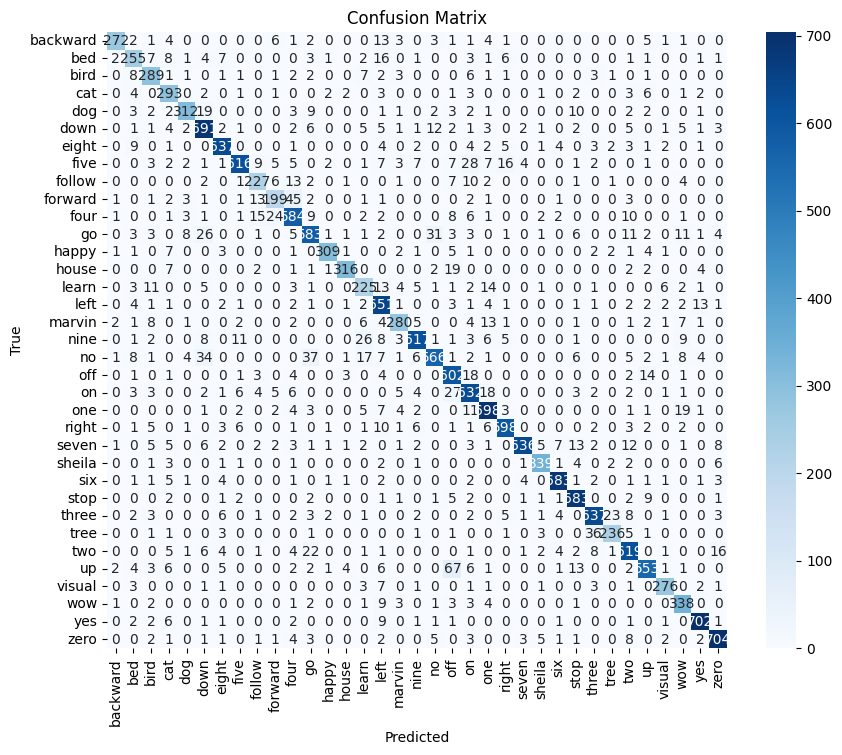

In [102]:
# Get unique classes from y_test and y_pred_classes
unique_classes = np.unique(np.concatenate((y_test, y_pred_classes)))

# Generate classification report
print(classification_report(y_test, y_pred_classes,
                            labels=unique_classes,
                            target_names=[le.classes_[i] for i in unique_classes]))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_classes, labels=unique_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[le.classes_[i] for i in unique_classes],
            yticklabels=[le.classes_[i] for i in unique_classes])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [1]:
import zipfile
import os

# Define the path to your ZIP file
zip_file_path = 'VoiceCommandDataset_User110.zip'  # Replace with your ZIP file name

# Define the directory to extract to
extract_to_dir = '/content/extracted_files'  # You can choose any directory

# Create the directory if it does not exist
if not os.path.exists(extract_to_dir):
    os.makedirs(extract_to_dir)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

print(f'Files extracted to {extract_to_dir}')


Files extracted to /content/extracted_files


In [2]:
import os
import numpy as np
import librosa

def load_custom_data(data_dir, sample_rate=16000, duration=1.0, n_mfcc=13, n_fft=2048, hop_length=512):
    data = []
    filenames = []
    for command in os.listdir(data_dir):
        command_dir = os.path.join(data_dir, command)
        if os.path.isdir(command_dir):
            for file in os.listdir(command_dir):
                if file.endswith('.wav'):
                    file_path = os.path.join(command_dir, file)
                    audio, _ = librosa.load(file_path, sr=sample_rate, duration=duration)
                    if len(audio) == sample_rate:
                        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
                        data.append(mfccs)
                        filenames.append(file)
    return np.array(data), np.array(filenames)

# Load your custom dataset
CUSTOM_DATA_DIR = '/content/extracted_files/VoiceCommandDataset_User110'
X_custom, filenames_custom = load_custom_data(CUSTOM_DATA_DIR)

# Preprocess the data
X_custom = np.expand_dims(X_custom, axis=-1)
if len(X_custom.shape) == 4:
    X_custom = np.squeeze(X_custom, axis=-1)
    X_custom = X_custom.transpose(0, 2, 1)

print("Custom dataset shape:", X_custom.shape)

Custom dataset shape: (934, 32, 13)


In [3]:
import os
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define constants
DATA_DIR = '/content/extracted_files/VoiceCommandDataset_User110'
SAMPLE_RATE = 16000
DURATION = 1.0
N_MFCC = 13
N_FFT = 2048
HOP_LENGTH = 512

def load_data(data_dir):
    data = []
    labels = []
    categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    for category in categories:
        path = os.path.join(data_dir, category)
        for file in os.listdir(path):
            if file.endswith('.wav'):
                file_path = os.path.join(path, file)
                audio, _ = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
                if len(audio) == SAMPLE_RATE:
                    mfccs = librosa.feature.mfcc(y=audio, sr=SAMPLE_RATE, n_mfcc=N_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH)
                    data.append(mfccs)
                    labels.append(category)
    return np.array(data), np.array(labels)

# Load and preprocess data
X, y = load_data(DATA_DIR)
X = np.expand_dims(X, axis=-1)  # Add channel dimension for CNN

In [4]:
# Adjust X shape if necessary
if len(X.shape) == 3:
    # If X is already in the shape (samples, time_steps, features)
    pass
elif len(X.shape) == 4:
    # If X is in the shape (samples, features, time_steps, 1)
    X = np.squeeze(X, axis=-1)
    X = X.transpose(0, 2, 1)
else:
    raise ValueError(f"Unexpected shape of X: {X.shape}")

print("Adjusted X shape:", X.shape)

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

Adjusted X shape: (934, 32, 13)


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1], X.shape[2])),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

# Print model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 30, 32)              │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 15, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 13, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 4, 64)               │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           1,625 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,625 (100.10 KB)

 Trainable params: 25,625 (100.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.0354 - loss: 25.3599 - val_accuracy: 0.0133 - val_loss: 4.6275
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1340 - loss: 3.3097 - val_accuracy: 0.2867 - val_loss: 2.5115
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4311 - loss: 2.1764 - val_accuracy: 0.5067 - val_loss: 1.8559
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6526 - loss: 1.5065 - val_accuracy: 0.5867 - val_loss: 1.2995
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7545 - loss: 0.9469 - val_accuracy: 0.8200 - val_loss: 0.7571
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9148 - loss: 0.5306 - val_accuracy: 1.0000 - val_loss: 0.3373
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9979 - loss: 0.2242 - val_accuracy: 1.0000 - val_loss: 0.1464
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0922 - val_accuracy: 1.0000 - va

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0222 
Test accuracy: 1.0
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
              precision    recall  f1-score   support

       alarm       1.00      1.00      1.00         8
    brighten       1.00      1.00      1.00         5
        call       1.00      1.00      1.00         8
       check       1.00      1.00      1.00         8
       close       1.00      1.00      1.00         6
    decrease       1.00      1.00      1.00         6
         dim       1.00      1.00      1.00        10
        find       1.00      1.00      1.00         5
    increase       1.00      1.00      1.00         5
        lock       1.00      1.00      1.00         3
        next       1.00      1.00      1.00         7
        open       1.00      1.00      1.00         4
       pause       1.00      1.00      1.00         3
        play       1.00      1.00      1.00         6
    previous       1.00      1.00      1.00        16
      

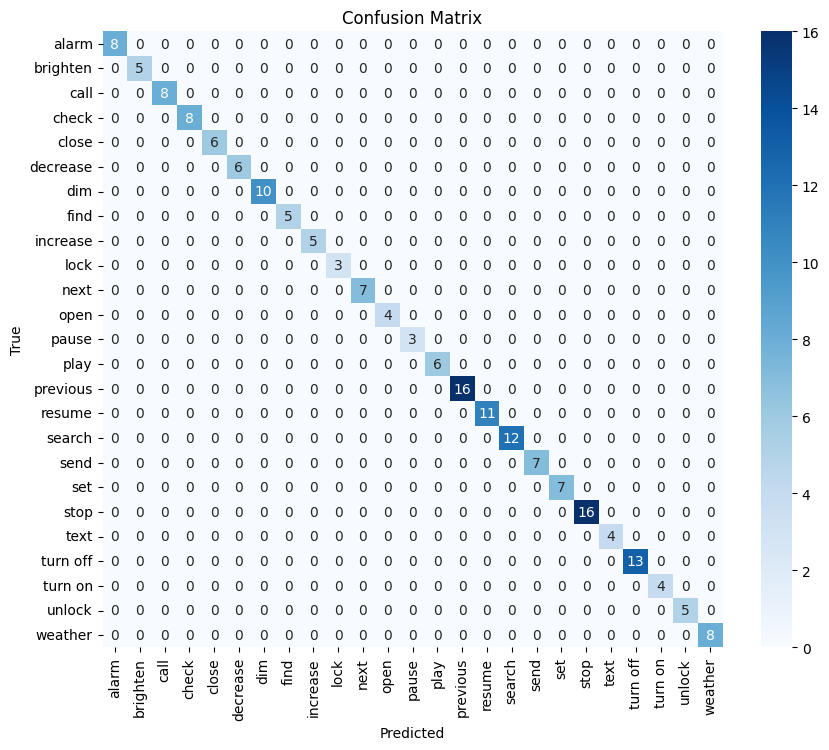

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Generate classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [7]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy}')

Test accuracy: 0.89


In [10]:
import tensorflow as tf
import numpy as np
import os
import hashlib

# Define the save path
save_path = './saved_model_and_data'
os.makedirs(save_path, exist_ok=True)

# Save model
model_path = os.path.join(save_path, 'speech_command_model.keras')
model.save(model_path)
print(f"Model saved to {model_path}")

# Save dataset
dataset_path = os.path.join(save_path, 'speech_command_dataset.npz')
np.savez(dataset_path, X=X, y=y)
print(f"Dataset saved to {dataset_path}")

# Function to compute MD5 checksum
def compute_md5(file_path):
    with open(file_path, 'rb') as file:
        md5_hash = hashlib.md5()
        for chunk in iter(lambda: file.read(4096), b""):
            md5_hash.update(chunk)
    return md5_hash.hexdigest()

# Compute and save checksums
checksums = {}
checksums['speech_command_model.keras'] = compute_md5(model_path)
checksums['speech_command_dataset.npz'] = compute_md5(dataset_path)

checksum_path = os.path.join(save_path, 'checksums.txt')
with open(checksum_path, 'w') as f:
    for file_name, checksum in checksums.items():
        f.write(f"{file_name}: {checksum}\n")

print(f"Checksums saved to {checksum_path}")

Model saved to ./saved_model_and_data/speech_command_model.keras
Dataset saved to ./saved_model_and_data/speech_command_dataset.npz
Checksums saved to ./saved_model_and_data/checksums.txt
